# Linear regression and Scikit-learn

## What is Scikit-learn?

Scikit-learn is a free software machine learning library. It implements an assortment of machine learning algorithms, including linear regression. In this notebook we demonstrate how to use Scikit-learn in linear regression problems.

## Diabetes dataset

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of $n = 442$ diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

**Number of instances:** 442

**Number of attributes:** First 10 columns are numeric predictive values.

**Target:** Column 11 is a quantitative measure of disease progression one year after baseline.

**Attribute information:**
- *age* age in years
- *sex*
- *bmi* body mass index
- *bp* average blood pressure
- *s1* total serum cholesterol
- *s2* low-density lipoproteins
- *s3* high-density lipoproteins
- *s4* total cholesterol / HDL
- *s5* possibly log of serum triglycerides level
- *s6* blood sugar level

### Load dataset

This dataset is already included in Scikit-learn, and can be loaded as follows:

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=False)

In [2]:
print("Independent variables:")
X.head()

Independent variables:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [3]:
print("Dependent variable:")
y.head()

Dependent variable:


0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

### Clean dataset

It is always a good practice to check for missing values in the data. Missing values might cause trouble if not handled properly. There are different approaches when dealing with missing values, for example

- Use a model which accepts missing values.
- Remove entries containing missing values.
- Fill missing values with appropriate valid values.

This step is called **data cleansing**.

In [4]:
X.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

For the diabetes dataset, there are no missing values, so we can just proceed with the analysis.

### Split dataset into training and testing

It is common to split the dataset into two smaller datasets known as *train* and *test*. The former is used to train the model in question and fit the parameters and the latter is used to test the performance of the trained model, instead of using the same dataset for both the training and testing. By doing so in this way, we can prevent overfitting and test if the model is able to predict unobserved data.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    random_state=1000)
print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 309
Test size: 133


For the diabetes dataset, we split the dataset in such a way that the train dataset contains 70% of the samples.

### Exploratory analysis and visualization

Before fitting any model, we should do an exploratory analysis of the data. An exploratory analysis will give us a better insight of the data, and it will usually help us to choose an appropriate model. Exploratory analysis includes, but is not limited to,

- Descriptive statistics such as mean, standard deviation, minimum, maximum, median and quartiles.
- Correlation matrix between independent and dependent variables.
- Box plots.
- Scatter plots.
- Histograms (for numeric variables).
- Bar charts (for categorical variables).

In [6]:
X_train.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,49.135922,1.423948,26.538835,94.441165,188.799353,114.816505,50.461165,3.989029,4.628214,91.563107
std,13.031467,0.494984,4.461471,14.086093,34.165067,30.358719,12.894494,1.259556,0.515413,11.494214
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,28.000000,2.000000,3.258100,60.000000
25%,40.000000,1.000000,23.300000,84.000000,165.000000,96.200000,41.000000,3.000000,4.276700,84.000000
50%,51.000000,1.000000,25.900000,92.330000,186.000000,113.000000,48.000000,4.000000,4.585000,92.000000
75%,59.000000,2.000000,29.500000,104.000000,208.000000,133.000000,58.000000,5.000000,4.983600,98.000000
max,79.000000,2.000000,41.300000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


From the descriptive statistics, we can observe the following:

- The range of age is between 19 and 79 years old, being 49 the average age.
- The average body mass index is 26.5, which falls into the category of overweight according to the World Health Organization.
- The average blood pressure is 94.4, which falls into the category of grade 1 hypertension for diastolic blood pressure.

In [7]:
y_train.describe()

count    309.000000
mean     152.579288
std       78.514605
min       25.000000
25%       88.000000
50%      140.000000
75%      212.000000
max      346.000000
Name: target, dtype: float64

In [8]:
print("Correlation matrix")
X_train.corr()

Correlation matrix


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.219556,0.124587,0.336019,0.277087,0.229304,-0.052302,0.213434,0.251671,0.299872
sex,0.219556,1.000000,0.110432,0.253257,0.045172,0.125323,-0.325263,0.303330,0.163677,0.247800
bmi,0.124587,0.110432,1.000000,0.355228,0.218628,0.248852,-0.390134,0.410095,0.413516,0.355352
bp,0.336019,0.253257,0.355228,1.000000,0.228936,0.173571,-0.174279,0.238993,0.375199,0.370448
s1,0.277087,0.045172,0.218628,0.228936,1.000000,0.898108,0.062501,0.552523,0.484583,0.313215
s2,0.229304,0.125323,0.248852,0.173571,0.898108,1.000000,-0.184976,0.670108,0.283927,0.297901
s3,-0.052302,-0.325263,-0.390134,-0.174279,0.062501,-0.184976,1.000000,-0.727097,-0.393159,-0.319090
s4,0.213434,0.303330,0.410095,0.238993,0.552523,0.670108,-0.727097,1.000000,0.601295,0.457515
s5,0.251671,0.163677,0.413516,0.375199,0.484583,0.283927,-0.393159,0.601295,1.000000,0.463338
s6,0.299872,0.247800,0.355352,0.370448,0.313215,0.297901,-0.319090,0.457515,0.463338,1.000000


The correlation matrix tell us how the features are correlated. A correlation coefficient close to 0 is considered a low correlation. A correlation coefficient close to 1 is considered a high positive correlation. A correlation coefficient close to -1 is considered a high negative correlation. Usually we want to avoid high correlation coefficients as this implies multicolinearity in the data. Nevertheless, we will not cover this topic for the moment.

In [9]:
print("Correlation with", y_train.name)
X_train.corrwith(y_train)

Correlation with target


age    0.177416
sex    0.032090
bmi    0.580796
bp     0.414832
s1     0.204876
s2     0.166537
s3    -0.392544
s4     0.424759
s5     0.561460
s6     0.397006
dtype: float64

The correlation coefficient between the independent variables and the dependent variable tell us how the dependent variable behaves against changes on the independent variables. A positive correlation implies an increasing relationship, and a negative correlation implies a decreasing relationship.

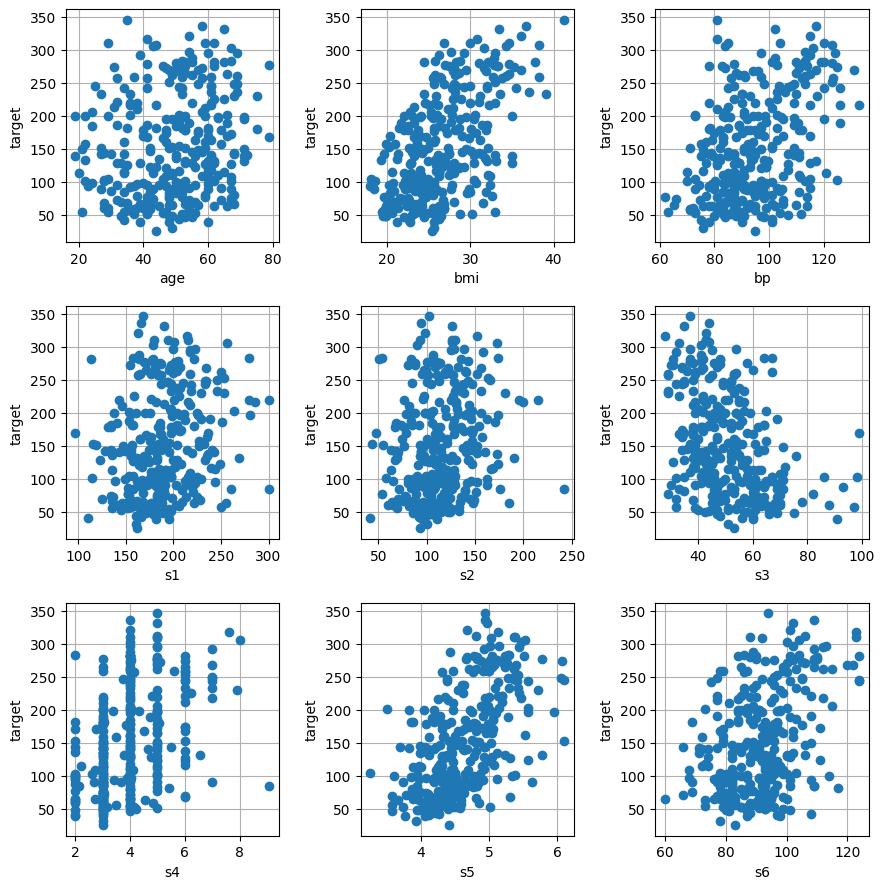

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
for i, feature in enumerate(X_train.columns.drop("sex")):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.xlabel(feature)
    plt.ylabel(y_train.name)
    plt.plot(X_train[feature], y_train, "o")
    plt.grid()
plt.show()

From the scatter plots, we observe a linear relationship between the dependent variable and each of the independent variables. More precisely, the response decreases as the high-density lipoproteins (*s3*) increases, and the response increases as the other features increases.

### Training

Once the exploratory analysis is done, we can choose an appropriate model and fit its parameters using the training dataset. For linear regression, the model parameters can be fitted as follows.

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
params = pd.Series(model.coef_, index=model.feature_names_in_)
params["intercept"] = model.intercept_

print("Fitted parameters:") 
print(params)

Fitted parameters:
age            0.133487
sex          -26.949102
bmi            5.958832
bp             1.000220
s1            -1.052175
s2             0.666203
s3             0.536161
s4             8.258065
s5            67.966278
s6             0.499259
intercept   -366.322322
dtype: float64


In [12]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

### Testing

Once the model is fitted, is time to evaluate its performance using the testing dataset. For linear regression, remember we have the following metrics:

- **Mean Squared Error**: Defined as the average of the squared differences between the true value and the predicted value.
- **Root Mean Squared Error**: Defined as the square root of the mean squared error.
- **Coefficient of determination**: Compares the model against a baseline model that always predicts the average. Best possible score is 1 and occurs when the predicted values match exactly the true values. Negative scores are possible when the model performs worse than the baseline model.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)

r2 = r2_score(y_test, y_pred)
print("Coefficient of determination:", r2)

Mean squared error: 2721.396184703889
Root mean squared error: 52.16700283420439
Coefficient of determination: 0.49877745956401465


The root mean squared error implies that $95\%$ of the predicted values are at most $1.96 \times 52.16 = 102.23$ units away from the true values. 

The coefficient of determination means that $49\%$ of the variations in the dependent variable can be explained by the independent variables.

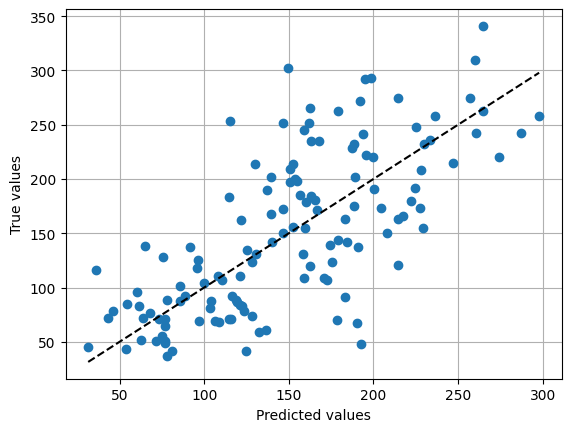

In [14]:
plt.figure()
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.plot(y_pred, y_test, "o")
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], "k--")
plt.grid()
plt.show()

The previous plot compares the predicted values vs the true values. The straight line corresponds to the identity function. We expect the predicted values to be close to the true values, or equivalently, we expect the points to be close to the identity line.

### Conclusion

Overall, linear regression seems to predict reasonably good for unobserved data in the diabetes dataset. There are some aspects where it can be improved (for example, we would like a higher coefficient of determination and a smaller mean squared error), but it's a good starting point. As we explore more models, we should be able to find one with better performance.

## California Housing dataset

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

**Number of Instances:** 20,640

**Number of Attributes:** 8 numeric, predictive attributes and the target

**Attribute Information:**

- *MedInc* median income in block group
- *HouseAge* median house age in block group
- *AveRooms* average number of rooms per household
- *AveBedrms* average number of bedrooms per household
- *Population* block group population
- *AveOccup* average number of household members
- *Latitude* block group latitude
- *Longitude* block group longitude

### Load dataset

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [16]:
print("Independent variables")
X.head()

Independent variables


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
print("Dependent variable:")
y.head()

Dependent variable:


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

### Clean dataset

In [18]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

There are no missing values in the dataset, so we can just proceed with the analysis.

### Split dataset into training and testing

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    random_state=1000)
print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 14447
Test size: 6193


We split the dataset in such a way that the train dataset contains 70% of the samples.

### Exploratory analysis and visualization

In [20]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000
mean,3.872841,28.630512,5.418607,1.093862,1418.759604,3.118509,35.628591,-119.567138
std,1.898265,12.552235,2.377981,0.417873,1122.739016,12.374748,2.134904,2.002341
min,0.499900,1.000000,0.846154,0.375000,6.000000,0.692308,32.550000,-124.350000
25%,2.565800,18.000000,4.445983,1.006208,785.000000,2.426748,33.930000,-121.790000
50%,3.531300,29.000000,5.230366,1.048611,1165.000000,2.813380,34.250000,-118.490000
75%,4.750000,37.000000,6.045171,1.098823,1720.000000,3.276832,37.710000,-118.010000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.490000


From the descriptive statistics, we can observe the following:

- The median income in block group ranges between 0.49 and 15, and is on average 3.87.
- The median house age in block group ranges between 1 and 52, and is on average 28.
- The average number of rooms per household ranges between 0.84 and 141.90, and is on average 5.41.
- The average number of bedrooms per household ranges between 0.37 and 25.63, and is on average 1.09.
- The block group population ranges between 6 and 35,682, and is on average 1,418.
- The average number of household members ranges between 0.69 and 1,243.33, and is on average 3.11.

In [21]:
y_train.describe()

count    14447.000000
mean         2.075360
std          1.157736
min          0.149990
25%          1.200000
50%          1.803000
75%          2.659500
max          5.000010
Name: MedHouseVal, dtype: float64

From the descriptive statistics, we can observe that the median house value ranges between 0.14 and 5 hundred thousand dollars, and is on average 2.07 hundred thousand dollars.

In [22]:
print("Correlation matrix")
X_train.corr()

Correlation matrix


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.118091,0.336177,-0.072806,0.013848,0.024726,-0.082464,-0.011855
HouseAge,-0.118091,1.000000,-0.153131,-0.082711,-0.296169,0.017252,0.013871,-0.107835
AveRooms,0.336177,-0.153131,1.000000,0.836264,-0.067676,-0.004076,0.104719,-0.025387
AveBedrms,-0.072806,-0.082711,0.836264,1.000000,-0.068846,-0.005274,0.071319,0.016470
Population,0.013848,-0.296169,-0.067676,-0.068846,1.000000,0.076902,-0.104209,0.095928
AveOccup,0.024726,0.017252,-0.004076,-0.005274,0.076902,1.000000,0.007884,-0.002166
Latitude,-0.082464,0.013871,0.104719,0.071319,-0.104209,0.007884,1.000000,-0.923983
Longitude,-0.011855,-0.107835,-0.025387,0.016470,0.095928,-0.002166,-0.923983,1.000000


We can tell from the correlation matrix that the average number of rooms is highly correlated with the average number of bedrooms. Similarly, the latitude has a high negative correlation with the longitude. This implies multicolinearity in the data, but we will ignore that for the moment.

In [23]:
print("Correlation with", y_train.name)
X_train.corrwith(y_train)

Correlation with MedHouseVal


MedInc        0.688465
HouseAge      0.103272
AveRooms      0.166706
AveBedrms    -0.042239
Population   -0.023131
AveOccup     -0.021102
Latitude     -0.145488
Longitude    -0.044057
dtype: float64

We can tell from the correlation coefficients that the median income, the average house age and the average number of rooms have a positive correlation with the median house value. Similarly, the average number of bedrooms, the block group population, the average number of household members, the latitude and the longitude have a negative correlation with the median house value.

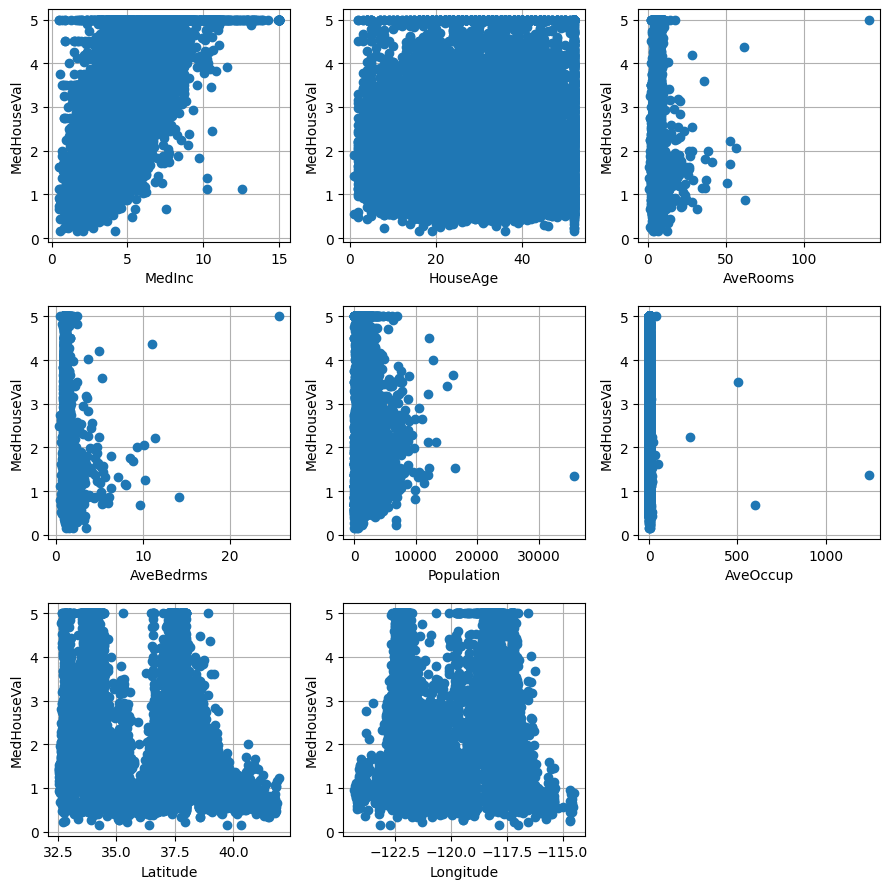

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
for i, feature in enumerate(X_train.columns):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.xlabel(feature)
    plt.ylabel(y_train.name)
    plt.plot(X_train[feature], y_train, "o")
    plt.grid()
plt.show()

From the scatter plot, we cannot distinguish a linear relationship between the median house value and any of the features. What is more, there seems to be outliers in the average number of rooms, the average number of bedrooms, the block group population and the average number of household members. For the moment, we will just ignore these possible outliers.

### Training

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
params = pd.Series(model.coef_, index=model.feature_names_in_)
params["intercept"] = model.intercept_

print("Fitted parameters:")
print(params)

Fitted parameters:
MedInc         0.447969
HouseAge       0.009678
AveRooms      -0.121915
AveBedrms      0.822025
Population    -0.000005
AveOccup      -0.003336
Latitude      -0.421843
Longitude     -0.435758
intercept    -37.230505
dtype: float64


### Testing

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)

r2 = r2_score(y_test, y_pred)
print("Coefficient of determination:", r2)

Mean squared error: 0.53645388670417
Root mean squared error: 0.7324301241102594
Coefficient of determination: 0.5907664747450214


The root mean squared error implies that $95\%$ of the predicted values for the median house value are at most $1.96 \times 0.73 = 1.43$ hundred thousand dollars away from the true values.

The coefficient of determination means that $59\%$ of the variations in the dependent variable can be explained by the independent variables.

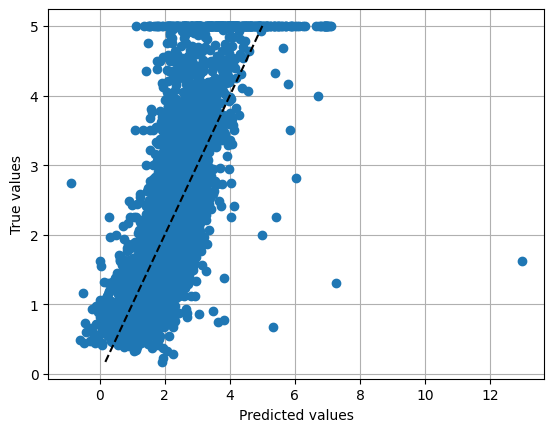

In [27]:
plt.figure()
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.plot(y_pred, y_test, "o")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
plt.grid()
plt.show()

The previous plot compares the predicted values vs the true values. The straight line corresponds to the identity function. We can observe a few points far from the straight line, which means that the model fails to predict those values.

### Conclusion

Linear regression didn't perform as expected for the California Housing dataset. We can clearly appreciate some observations where the model fails to predict. However, this doesn't mean that linear regression is useless, it means that we need to add some considerations in the model. The next step could be to try to handle the multicolinearity and the outliers we observed during the exploratory analysis.

## References

Scikit-learn User Guide:
- [1.1. Linear Models, 1.1.1. Ordinary Least Squares](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)
- [3.3. Metrics and scoring: quantifying the quality of predictions, 3.3.4. Regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
- [7.1. Toy datasets, 7.1.2. Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)
- [7.2. Real world datasets, 7.2.7. California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)